In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. (Handwritten Digit Recognition) The MNIST dataset is an image dataset with handwritten numbers. Handwritten digit recognition is the problem of classifying handwritten images into numbers.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)





# a. Please download the MNIST dataset
(You can receive it through the site or through dataloader).
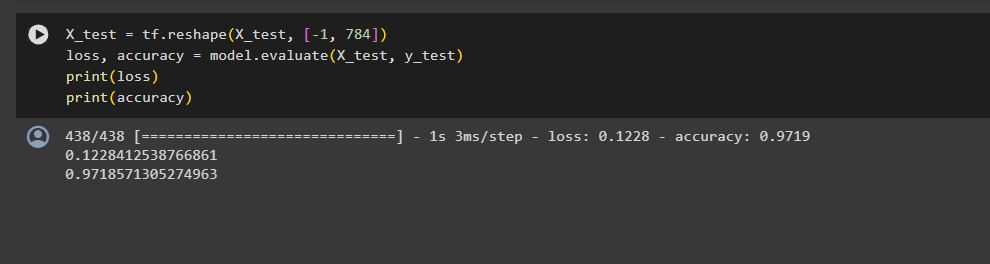
Load and show any sample images in Matlab or Python.




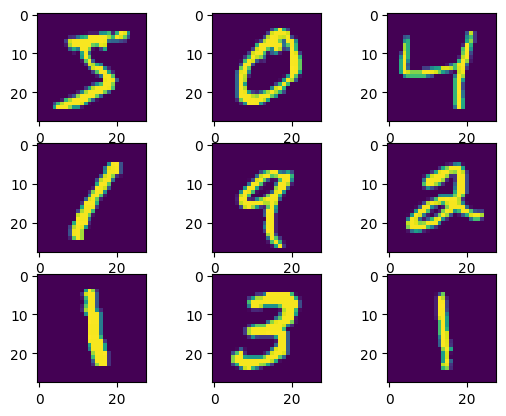

In [ ]:
fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[i*3 + j])
plt.show()




b. The input data you use is divided into several sets for training set & test set.
Also, randomly take 10% of the training set as validation set.




In [ ]:
# merge both the training sets and the test sets
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# randomize both sets and split it apart
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=333,
                                                    stratify=y)

# separate 10% of training set into validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.1)

# b. Make the MLP model with following conditions:

- Build a flatten layer.

- Add 3 or more layers perceptron.

- Use ReLU as the activation function of each layer.

- After the last layer, use Softmax and Cross Entropy as the loss function.

In [ ]:
# flatten layer
X_train = tf.reshape(X_train, [-1, 784])
X_valid = tf.reshape(X_valid, [-1, 784])

# Build the model
model = models.Sequential()

# Input layer
model.add(layers.Dense(units=256, activation='relu', input_dim=784))

# Hidden layers
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))

# Output layer
model.add(layers.Dense(units=10, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 244522 (955.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1575/1575 [==============================] - 10s 5ms/step - loss: 0.7198 - accuracy: 0.8775 - val_loss: 0.2552 - val_accuracy: 0.9286
Epoch 2/20
1575/1575 [==============================] - 6s 4ms/step - loss: 0.1996 - accuracy: 0.9445 - val_loss: 0.2149 - val_accuracy: 0.9441
Epoch 3/20
1575/1575 [==============================] - 7s 4ms/step - loss: 0.1437 - accuracy: 0.9594 - val_loss: 0.1342 - val_accuracy: 0.9593
Epoch 4/20
1575/1575 [==============================] - 6s 4ms/step - loss: 0.1286 - accuracy: 0.9636 - val_loss: 0.1375 - val_accuracy: 0.9623
Epoch 5/20
1575/1575 [==============================] - 7s 5ms/step - loss: 0.1090 - accuracy: 0.9690 - val_loss: 0.1406 - val_accuracy: 0.9613
Epoch 6/20
1575/1575 [==============================] - 6s 4ms/step - loss: 0.0884 - accuracy: 0.9744 - val_loss: 0.1297 - val_accuracy: 0.9604
Epoch 7/20
1575/1575 [==============================] - 7s 5ms/step - loss: 0.0739 - accuracy: 0.9792 - val_loss: 0.1018 - val_accuracy

# c. Train the model using the training set.

Plot train/validation loss and train/validation accuracy for each epoch, and check when convergence occurs.

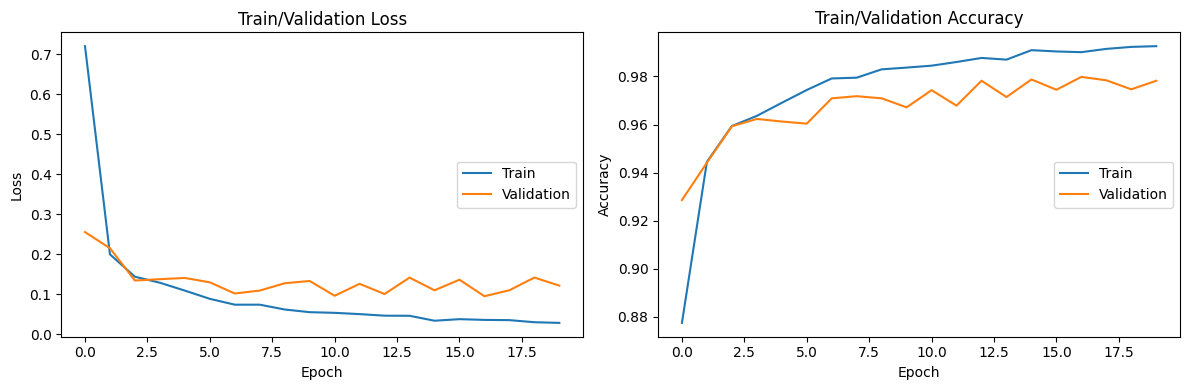

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train/Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='right')

plt.tight_layout()
plt.show()

d.
Check the accuracy on the test set, and consider how to improve the performance of the designed MLP.

In [ ]:
X_test = tf.reshape(X_test, [-1, 784])
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

438/438 [==============================] - 1s 3ms/step - loss: 0.1336 - accuracy: 0.9793
0.13358192145824432
0.979285717010498


After a few testings, adding more hidden layers does not nesscarily improve the model performance.

In my first attempt, I tried with 3 hidden layers and 10 epoch and the acccuracy was 0.97185.


Second attempts with 5 hidden layers and 10 epoch, the accuracy was 0.97192, the training time takes around 2 second more in each epoch but there's no significant improvement in the accuracy rate.

However, by resuming the hidden layers to 3 and increase the epoch to 20, the training time takes less than 5 hidden layers needed and the accuracy improved a lot from 0.971 to 0.979.



# 2. Please explain the reason for dividing data into train /validation / test and the roles of each.

The reason for dividing data into the mnetioned part is to create a model that generalizes well to new data. Using same dataset to train the model that to be tested will result in overfitting or underfitting.



```
Train Set
Goal:
Used to train the machine learning models.
Role:
The model will learn from the data in the training set to directly improve the parameters.
The model learn the patterns or relationships within that help with the upcoming classification / prediction task.
```



```
Validation Set
Goal:
Used to tune hyperparameters and evaluate the model's performance during training.
Role:
Helps prevent overfitting and gain insight to generalize new data.
Adjust hyperparameters within can seek for the most optimal result in improving the performance.
```


```
Test Set
Goal:
Used to evaluate the final model's performance after training.
Role:
Provides an unbiased evaluation of the model's ability to generalize to new data.
It can be used to test if the trained model has captured the patterns and
performance different task with high accuracy.
```


